# Hotel Booking Cancellation Analysis
    

## Importing Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset
> We load the dataset to examine its structure and contents. The dataset contains information on hotel bookings, including customer details, booking status, and stay duration.  
    

In [80]:
# Loading the CSV file and storing the data in a pandas Dataframe
df = pd.read_csv('hotel_bookings.csv')

# Exploratory Data Analysis and Data Cleaning

In [81]:
# displaying the first five rows of the dataset using the head() method
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [82]:
# displaying the last five rows of the dataset using the tail() method
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [83]:
# Retrieving the shape of the Dataframe to check the number of rows and columns
df.shape

(119390, 32)

> Hotel Booking dataset has a huge number of data with 1,19,390 columns and 32 rows

In [84]:
# Retrieving the list of column names in the Dataframe
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [85]:
# Displaying the Dataframe's summary information including column names, non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [86]:
# Converting to datetime format as it plays key role in our analysis 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [88]:
# To get details of categorical data 
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [89]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [90]:
# Calculating the total number of missing values in each column
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

> - Since the **"agent"** and **"company"** columns contain a significant amount of missing data, they can be removed.
> - Additionally, there are **488 rows** with missing values in **"country"** column, so these rows can be dropped to maintain data consistency.

In [91]:
# Dropping unnecessary columns from the Dataframe
df.drop(['company','agent'],axis=1,inplace=True)

# Dropping rows with missing values from the Dataframe
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [93]:
# Generating summary statistics of the Dataframe to analyze numerical column distributions
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


> From the summary statistics, we observe the following outliers:
> - **Number of children and babies**: Values like**10 or 9** are significantly higher than typical family sizes, indicating potential data entry errors.
> - **Negative ADR(Average Daily Rate)**: ADR cannot be negative, suggesting incorrect or misrecorded data.
> - **Extremely high ADR(5400)**: This value is unusually high compared to the dataset's typical range, making it an outlier.

**Removing Outliers:** 

In [94]:
ch_out=df[df['children']==10].index
ch_out

Int64Index([328], dtype='int64')

In [95]:
ba_out=df[(df['babies']==10) | (df['babies']==9)].index
ba_out

Int64Index([46619, 78656], dtype='int64')

In [96]:
il=[ch_out[0],ba_out[0],ba_out[1]]
il

[328, 46619, 78656]

In [97]:
df = df.drop(il)

In [98]:
df = df[(df['adr']<5000) & (df['adr']>=0) ]

In [99]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000,118893.000000
mean,0.371351,104.313021,2016.157671,27.166881,15.800998,0.928852,2.502082,1.858394,0.104127,0.007789,0.032004,0.087146,0.131623,0.221132,2.330852,101.959538,0.061888,0.571691
std,0.483168,106.904428,0.707453,13.589853,8.780388,0.996145,1.900046,0.578582,0.398147,0.089238,0.176010,0.845887,1.484693,0.652746,17.630816,48.090865,0.244177,0.792687
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis and Visualizations
> - Analyzing cancellation trends over time for both the hotels.  
> - Identifying which factors contribute to the cancellations.  
> - Visualizing the relationship between different variables.  

In [100]:
# Setting the seaborn style to "darkgrid" for better visualization aesthetics
sns.set_style('darkgrid')

In [101]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [102]:
# Calculating percentage of cancelled and not_cancelled reservations
cancelled_perc= df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

0    0.628649
1    0.371351
Name: is_canceled, dtype: float64


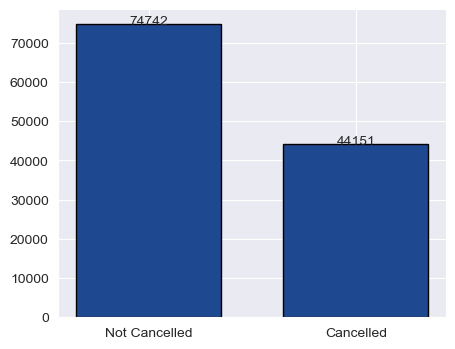

In [103]:
# Bar chart comparing cancelled and non-cancelled reservations

# Set up the plot
plt.figure(figsize=(5,4))
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),color='#1e488f',edgecolor='k',width = 0.7)

# Enhance the plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center')
addlabels(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts())

# Display the plot
plt.show()

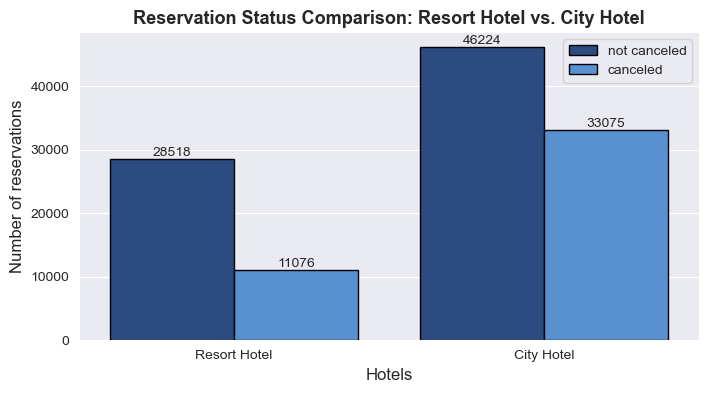

In [104]:
# Countplot comparing reservation status by hotel type(City Hotel & Resort Hotel)

# Set up the plot
plt.figure(figsize=(8,4))
ax = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['#1e488f','#448ee4'],edgecolor='k')

# Enhance the plot
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Reservation Status Comparison: Resort Hotel vs. City Hotel",fontdict={'fontweight' : 'bold','fontsize':13})
plt.xlabel("Hotels",fontsize=12)
plt.ylabel("Number of reservations",fontsize=12)
plt.legend(['not canceled','canceled'])

# Display the plot
plt.show()

In [105]:
# Percentage count of cancelled and not-cancelled reservations in Resort Hotel

resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


0    0.720261
1    0.279739
Name: is_canceled, dtype: float64

In [106]:
# Percentage count of cancelled and not-cancelled reservations in City Hotel

city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

In [107]:
# Calculating the average ADR per day for Resort Hotel
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()

# Calculating the average ADR per day for City Hotel
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean()

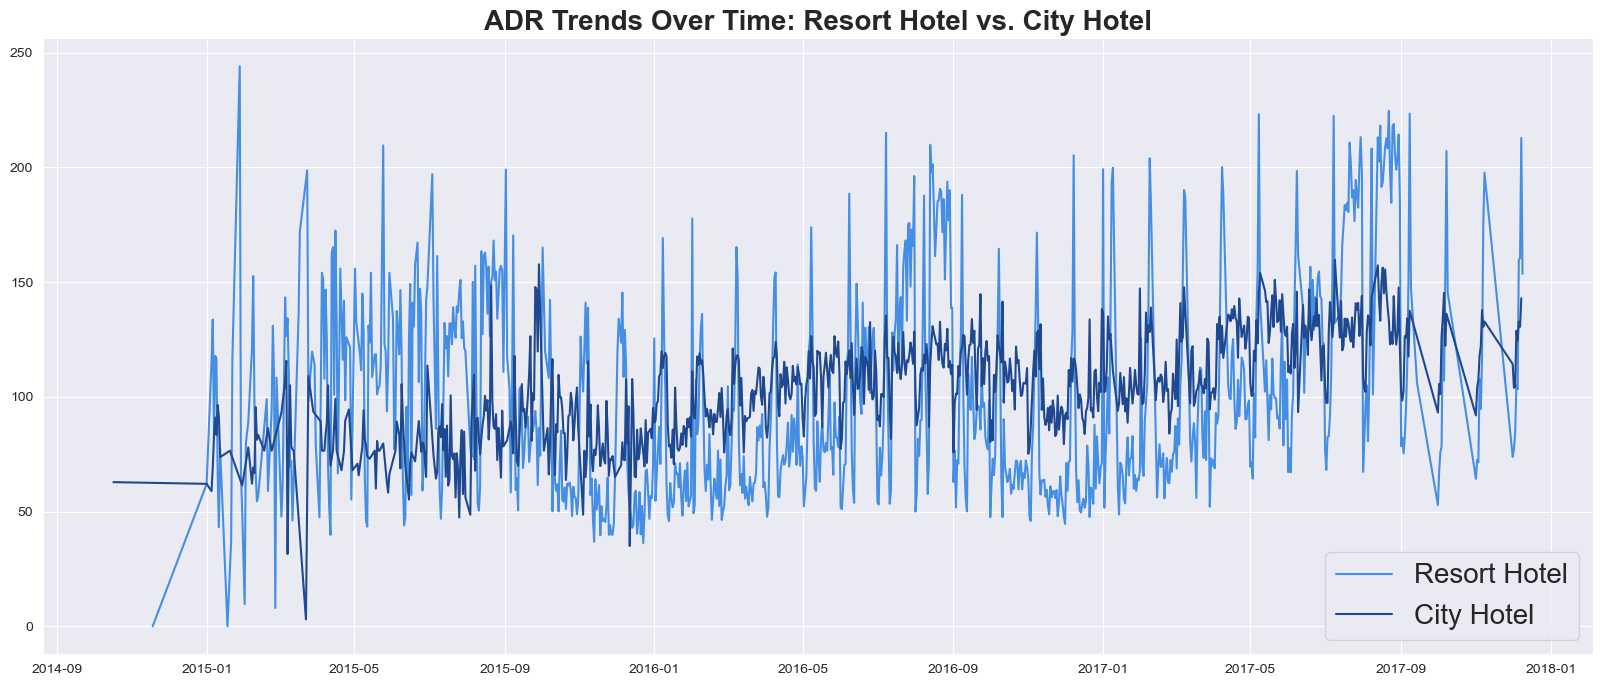

In [108]:
# Line plot comparing ADR trends over time for Resort Hotel and City Hotel

# Set up the plot
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index,resort_hotel.values,color='#448ee4',label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel.values,color='#1e488f',label='City Hotel')

# Enhance the plot
plt.title("ADR Trends Over Time: Resort Hotel vs. City Hotel",fontdict={'fontweight' : 'bold','fontsize' :20 })
plt.legend(fontsize=20)

# Display the plot
plt.show()

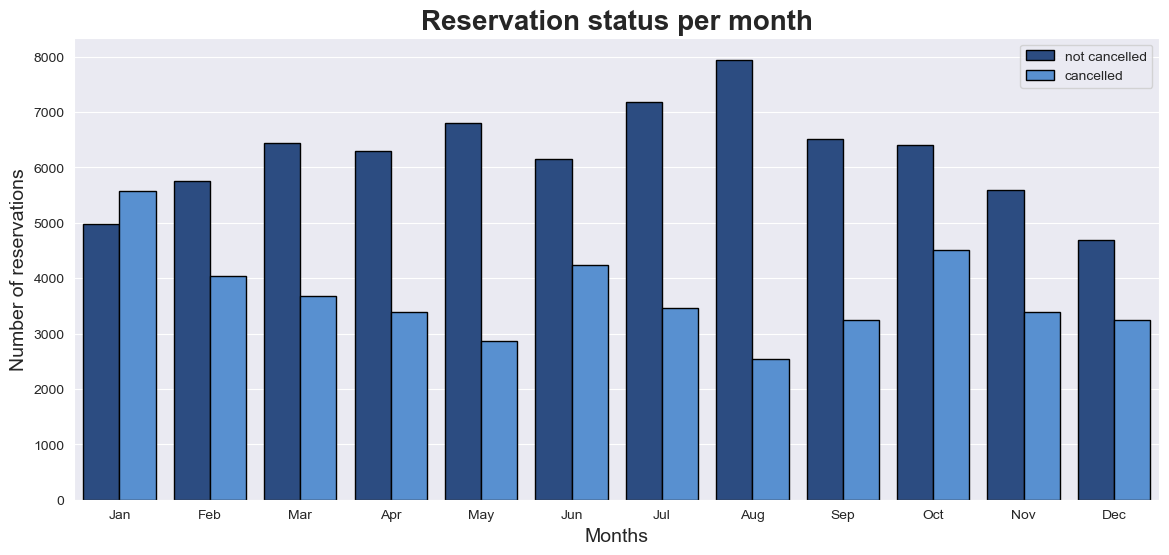

In [109]:
# Countplot showing monthly reservation status(Cancelled vs. Not-Cancelled)

# Set up the plot
df['monthname']=df['reservation_status_date'].dt.month_name().str[:3]
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(14,6))
sns.countplot(x='monthname',hue = 'is_canceled',data = df,order=Months,palette=['#1e488f','#448ee4'],edgecolor='k')

# Enhance the plot
plt.title("Reservation status per month",fontdict={'fontweight' : 'bold','fontsize' :20 })
plt.xlabel("Months",fontsize=14)
plt.ylabel("Number of reservations",fontsize=14)
plt.legend(["not cancelled","cancelled"])

# Display the plot
plt.show()

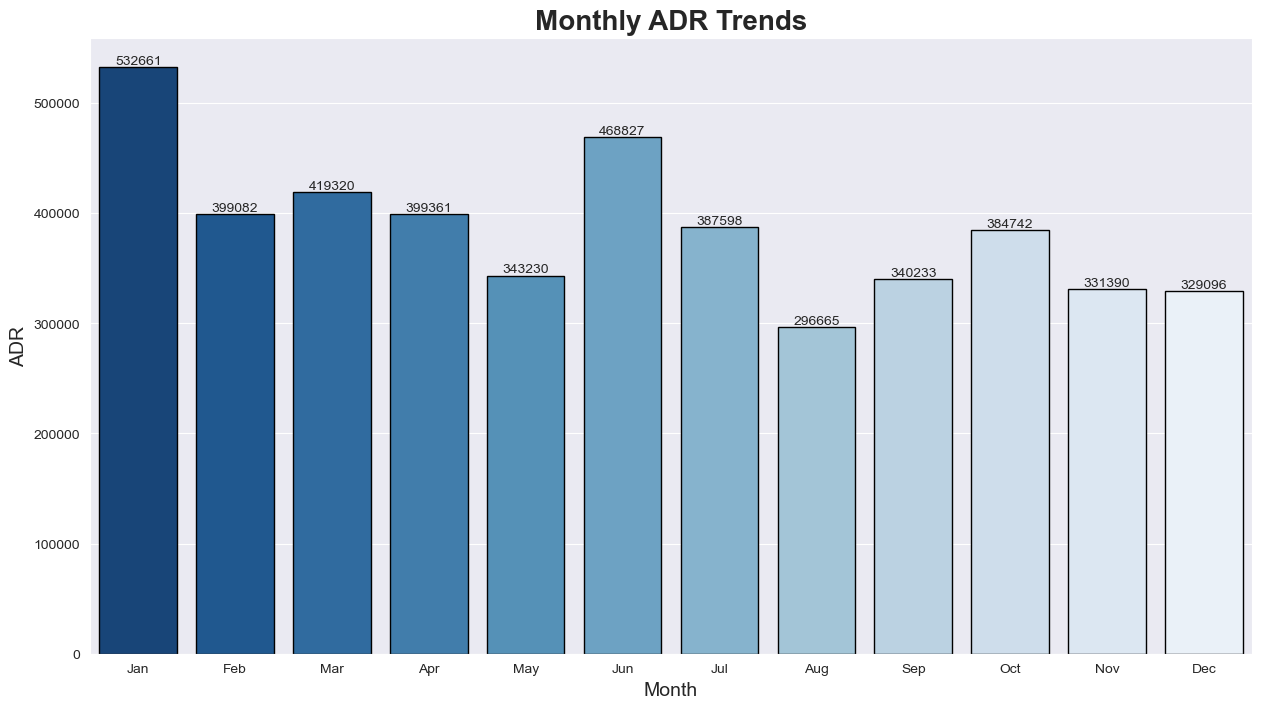

In [110]:
# Bar plot showing monthly ADR trends  

# Set up the plot
plt.figure(figsize=(15,8))
da = df[df['is_canceled']==1].groupby('monthname')['adr'].sum().reset_index()
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
palette=sns.color_palette("Blues",n_colors=12)
palette.reverse()
ax=sns.barplot(x='monthname',y='adr',data = da,order=Months,palette=palette,edgecolor='k')

# Enhance the plot
plt.title("Monthly ADR Trends",fontdict={'fontweight' : 'bold','fontsize' :20 })
ax.bar_label(ax.containers[0],fontsize=10)
plt.xlabel("Month",fontsize=14)
plt.ylabel("ADR",fontsize=14)

# Display the plot
plt.show()

In [111]:
# Calculating average ADR per day for Cancelled Reservations and sorting them by date
cancelled_data=df[df['is_canceled']==1]
cancelled_adr=cancelled_data.groupby('reservation_status_date')['adr'].mean()
cancelled_adr.sort_index(inplace=True)

# Calculating average ADR per day for Not-Cancelled Reservations and sorting them by date
not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_adr=not_cancelled_data.groupby('reservation_status_date')['adr'].mean()
not_cancelled_adr.sort_index(inplace=True)

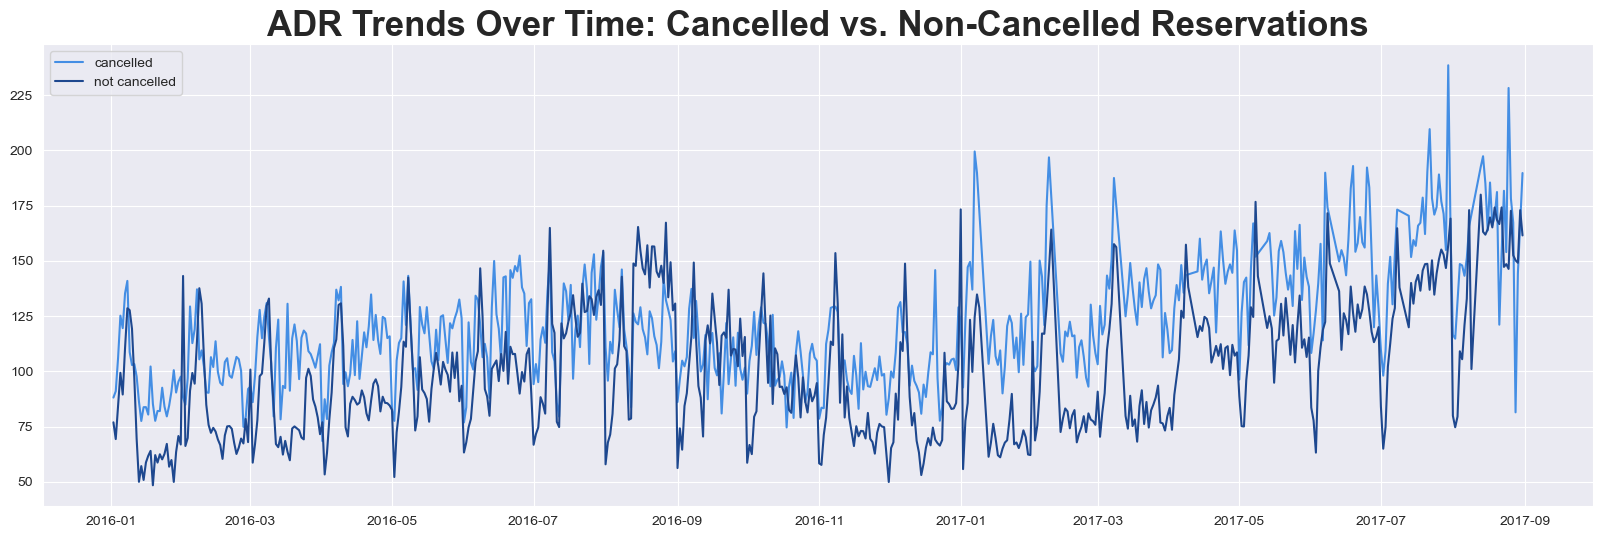

In [115]:
# Line Plot comparing ADR trends over time for Cancelled & Not-Cancelled Reservations

# Set up the plot
plt.figure(figsize=(20,6))
plt.plot(cancelled_adr.index,cancelled_adr.values,color='#448ee4',label='cancelled')
plt.plot(not_cancelled_adr.index,not_cancelled_adr.values,color='#1e488f',label='not cancelled')

# Enhance the plot
plt.title("ADR Trends Over Time: Cancelled vs. Non-Cancelled Reservations",fontdict={'fontweight' : 'bold','fontsize' :25 })
plt.legend()

# Display the plot
plt.show()



> The data shows greater variability before 2015 and after September 2017 due to inconsistencies. To ensure a clearer analysis, we will filter the data to include only reservations from **Jan 2016 to September 2017** and replot the line chart comparing ADR trends over time.

In [113]:
# Analyzing the relation between mean adr and reservation status between 2016 to 2017
cancelled_adr=cancelled_adr[(cancelled_adr.index > '2016') & (cancelled_adr.index < '2017-09' )]
not_cancelled_adr=not_cancelled_adr[(not_cancelled_adr.index > '2016') & (not_cancelled_adr.index < '2017-09' )]

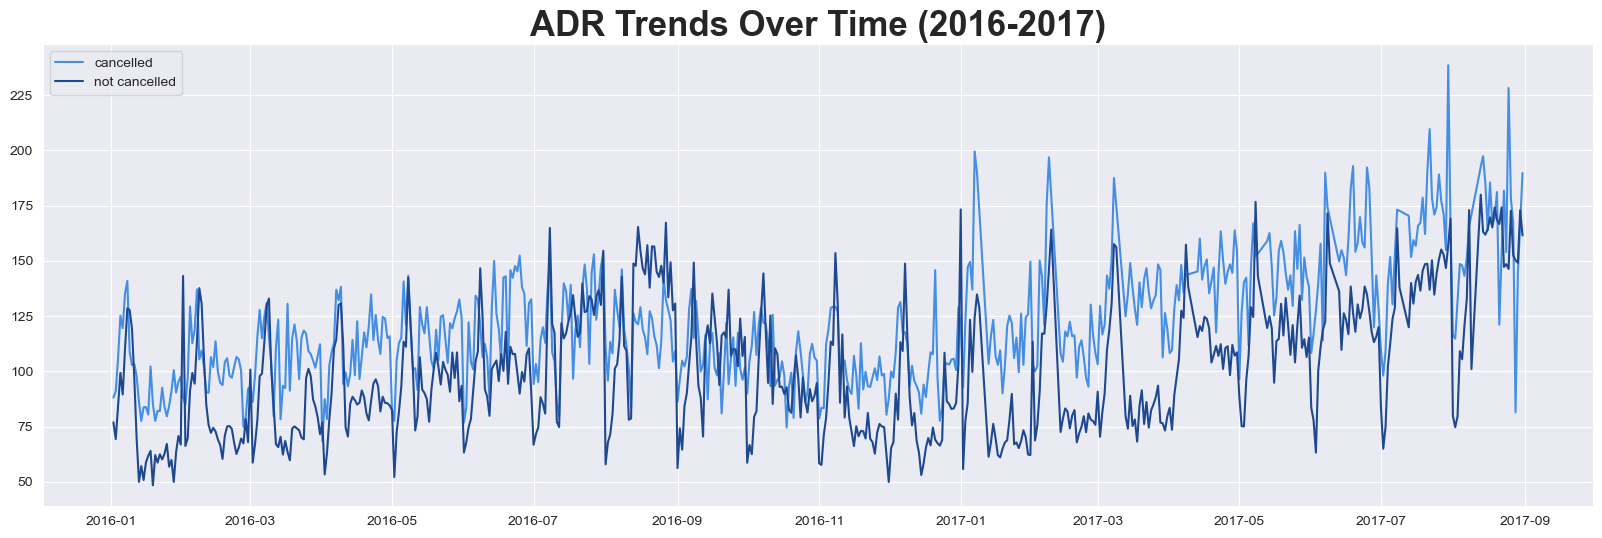

In [116]:
# Set up the plot
plt.figure(figsize=(20,6))
plt.plot(cancelled_adr.index,cancelled_adr.values,color='#448ee4',label='cancelled')
plt.plot(not_cancelled_adr.index,not_cancelled_adr.values,color='#1e488f',label='not cancelled')

# Enhance the plot
plt.title("ADR Trends Over Time (2016-2017)",fontdict={'fontweight' : 'bold','fontsize' :25 })
plt.legend()

# Display the plot
plt.show()

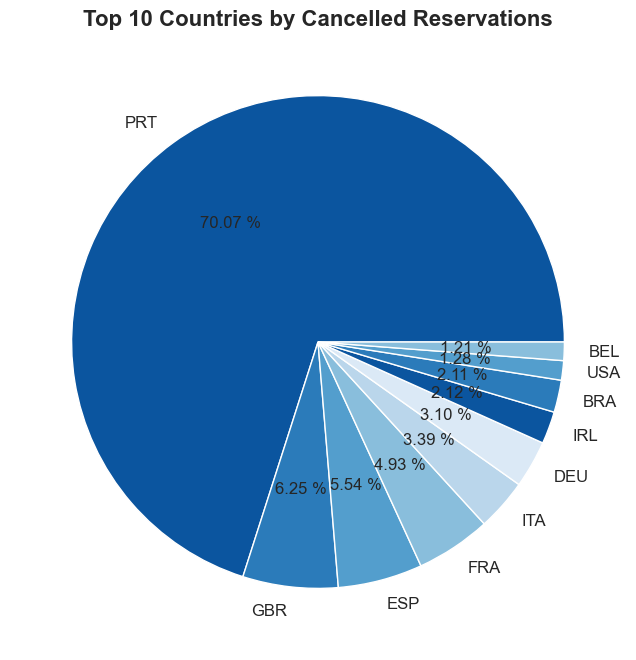

In [117]:
# Pie chart showing top 10 countries with most cancellations

# Set up the plot
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))

# Enhance the plot
palette=sns.color_palette("Blues")
palette.reverse()
plt.pie(top_10_country,autopct= '%.2f %%',colors=palette,labels=top_10_country.index,textprops={'fontsize':12})
plt.title("Top 10 Countries by Cancelled Reservations",fontdict={'fontweight' : 'bold','fontsize' :16 })

# Display the plot
plt.show()

In [119]:
# Calculating the cancellation percentage for each market segment
cancel_segments = cancelled_data['market_segment'].value_counts(normalize=True)

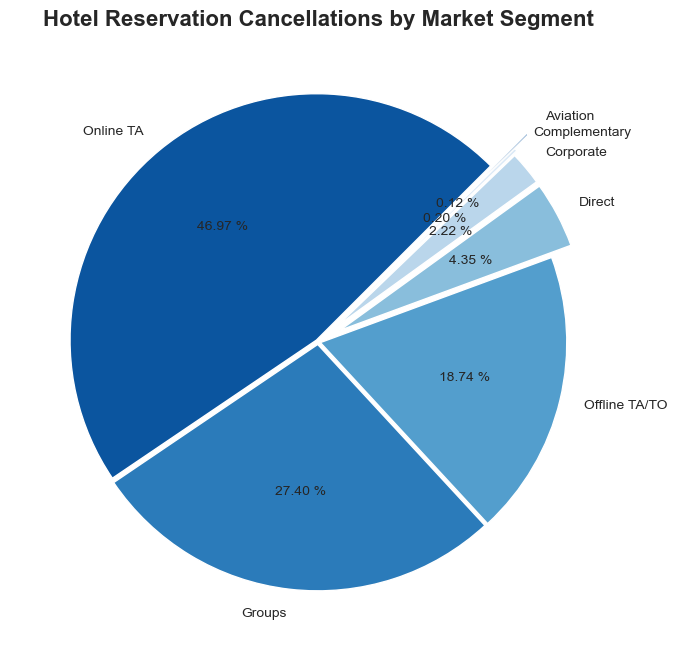

In [120]:
# Pie chart showing percentage of cancellations across different market segments

# Set up the plot
plt.figure(figsize=(8,8))

# Enhance the plot
plt.title("Hotel Reservation Cancellations by Market Segment",fontdict={'fontweight' : 'bold','fontsize' :16 })
palette=sns.color_palette("Blues")
palette.reverse()
explode=(.01,.01,.01,.1,.1,.12,.2)
plt.pie(cancel_segments,explode=explode,startangle=45,autopct= '%.2f %%',colors=palette,labels=cancel_segments.index,textprops={'fontsize':10})

# Display the plot
plt.show()

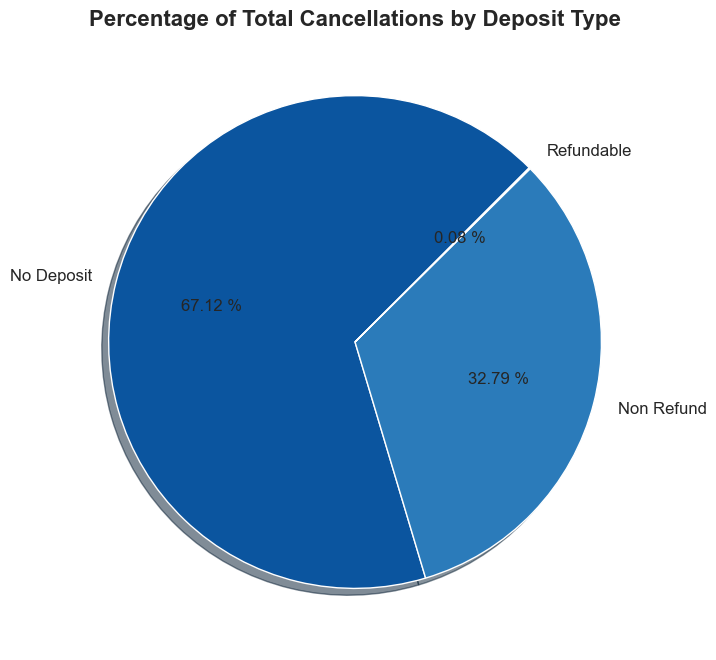

In [121]:
# Pie chart showing percentage of cancellations categorized by deposit type

# Set up the plot
deposit_type_cancellation = cancelled_data['deposit_type'].value_counts(normalize=True)
plt.figure(figsize=(8,8))

# Enhance the plot
plt.title("Percentage of Total Cancellations by Deposit Type",fontdict={'fontweight' : 'bold','fontsize' :16 })
palette=sns.color_palette("Blues")
palette.reverse()
plt.pie(deposit_type_cancellation,startangle=45,shadow=True,autopct= '%.2f %%',colors=palette,labels=deposit_type_cancellation.index,textprops={'fontsize':12})

# Display the plot
plt.show()

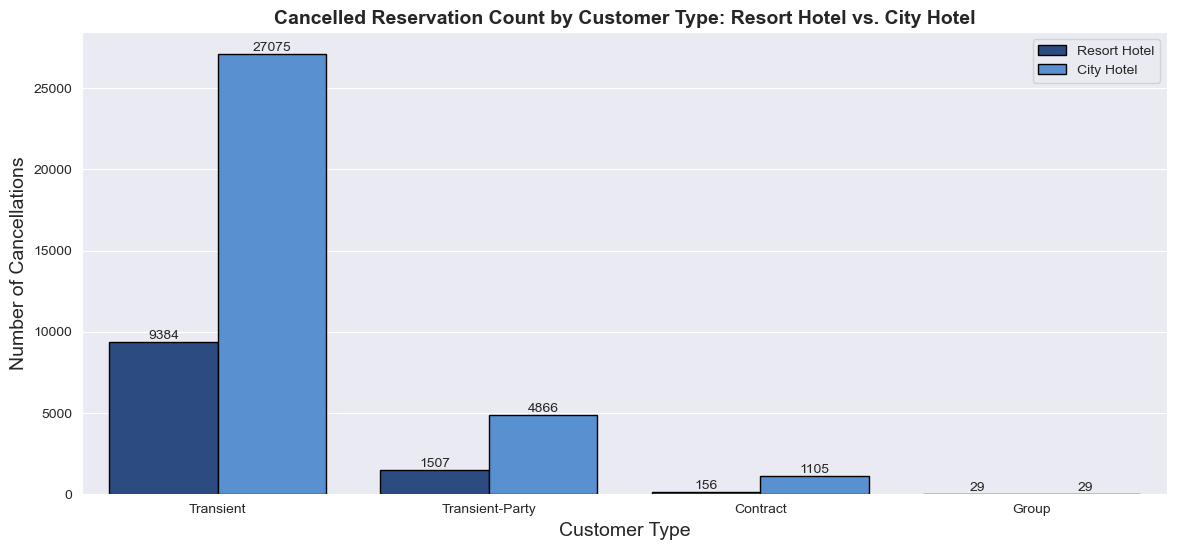

In [123]:
# Countplot showing impact of customer type on cancellations

# Set up the plot
plt.figure(figsize=(14,6))
ax=sns.countplot(x='customer_type',hue = 'hotel',data = cancelled_data,order=cancelled_data['customer_type'].value_counts(ascending=False).index,palette=['#1e488f','#448ee4'],edgecolor='k')

# Enhance the plot
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Cancelled Reservation Count by Customer Type: Resort Hotel vs. City Hotel",fontdict={'fontweight' : 'bold','fontsize' :14 })
plt.xlabel("Customer Type",fontsize=14)
plt.ylabel("Number of Cancellations",fontsize=14)
plt.legend(["Resort Hotel","City Hotel"])

# Display the plot
plt.show()

In [126]:
''' The correlation value between 'days_in_waiting_list' and 'is_canceled' 
    returns a correlation value indicating how strongly the 2 variables are related '''

df['days_in_waiting_list'].corr(df['is_canceled'])

0.05401718708664074

> - The correlation value is near 0 indicating there is **no significant relationship between waiting list days and cancellations**. 
> - This is quite unexpected as it goes against common assumptions that bookings left on the waiting list for longer periods are more likely to be cancelled.

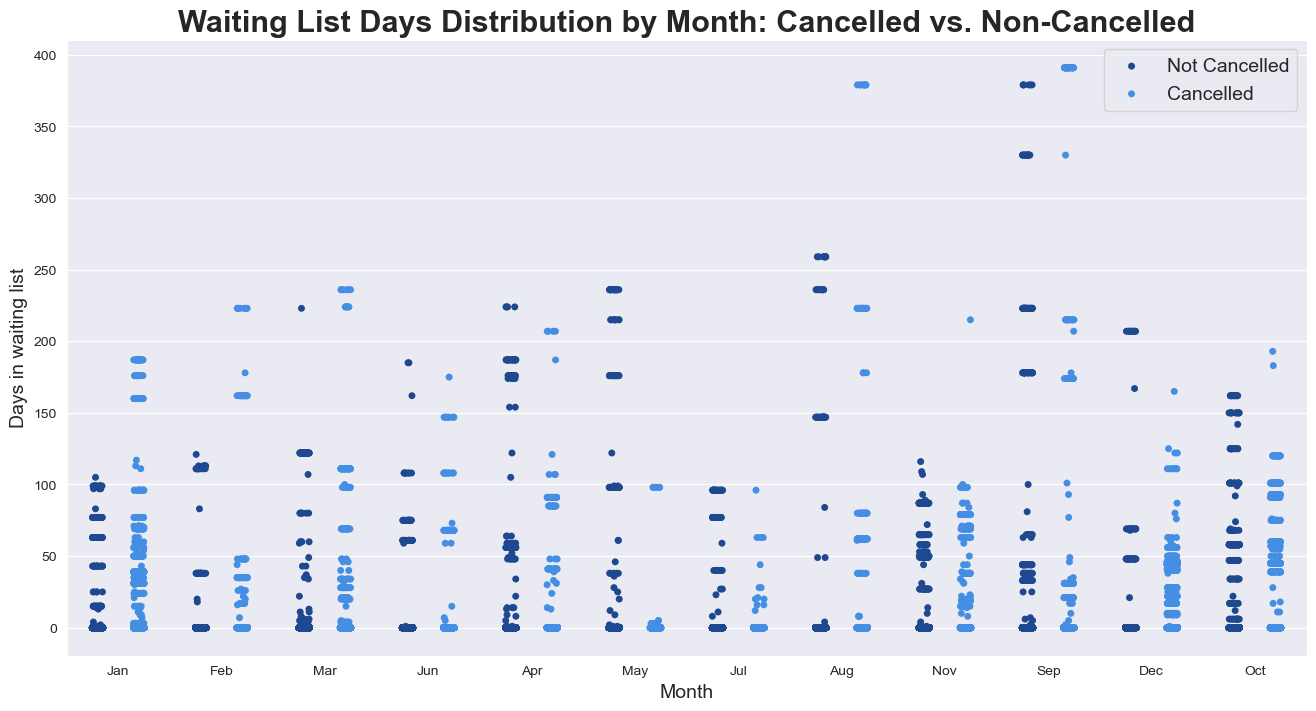

In [128]:
# Strip plot showing correlation between waiting list days and cancellations by month

# Set up the plot
plt.figure(figsize=(16,8))
sns.stripplot(x='monthname',y='days_in_waiting_list',data=df,hue='is_canceled',palette=['#1e488f','#448ee4'],dodge=True)

# Enhance the plot
plt.title("Waiting List Days Distribution by Month: Cancelled vs. Non-Cancelled",fontdict={'fontweight' : 'bold','fontsize' :22 })
plt.xlabel("Month",fontsize=14)
plt.ylabel("Days in waiting list",fontsize=14)
plt.legend(labels=["Not Cancelled","Cancelled"],fontsize=14)

# Display the plot
plt.show()

In [129]:
''' The correlation value between 'lead time' and 'is_canceled' 
    returns a correlation value indicating how strongly the 2 variables are related '''

df['lead_time'].corr(df['is_canceled'])

0.29201144004968516

> - The correlation value of **0.29** between lead time and cancellations indicates a **weak to moderate positive coorelation**.
> - This suggests that **as lead time increases, the likelihood of cancellation also increases**, but the relationship is **not very strong**.

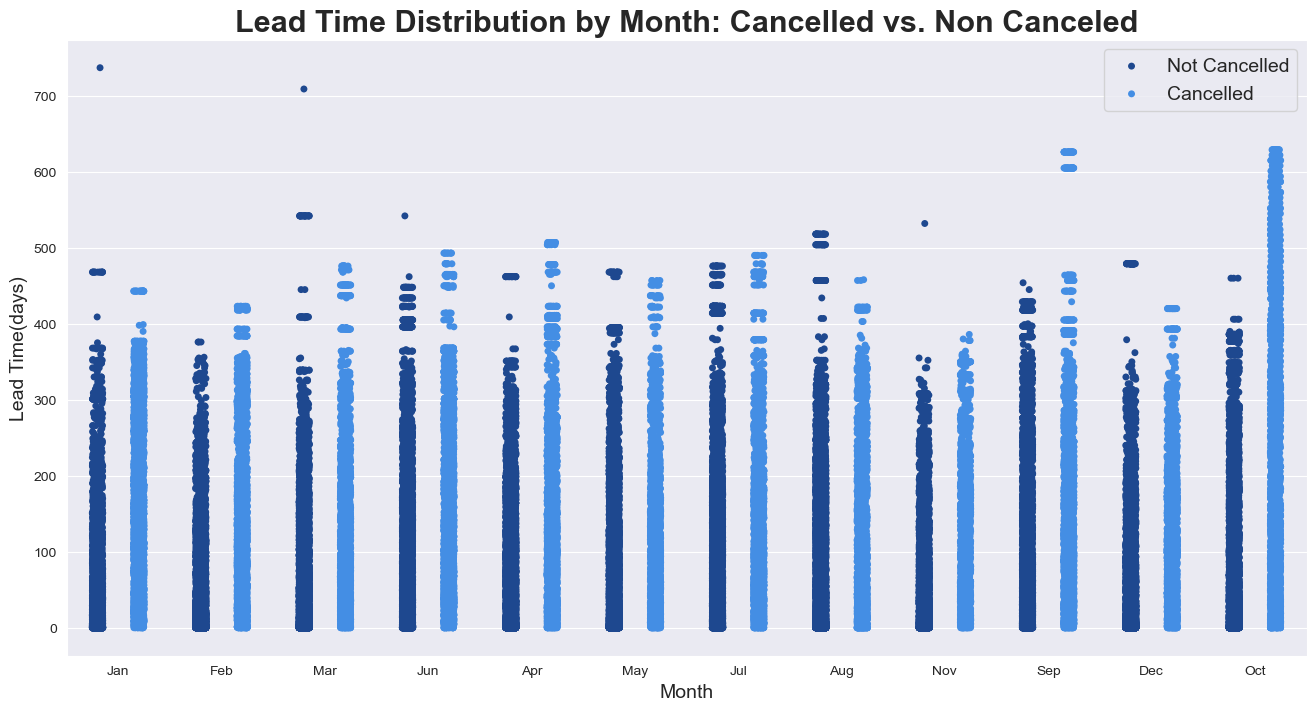

In [130]:
# Strip plot showing correlation between lead time and cancellations by month

# Set up the plot
plt.figure(figsize=(16,8))
sns.stripplot(x='monthname',y='lead_time',data=df,hue='is_canceled',palette=['#1e488f','#448ee4'],dodge=True)

# Enhance the plot
plt.title("Lead Time Distribution by Month: Cancelled vs. Non Canceled",fontdict={'fontweight' : 'bold','fontsize' :22 })
plt.xlabel("Month",fontsize=14)
plt.ylabel("Lead Time(days)",fontsize=14)
plt.legend(labels=["Not Cancelled","Cancelled"],fontsize=14)
plt.savefig('Lead time and Cancellations.png', dpi=300)
# Display the plot
plt.show()